In [1]:
#anomaly_data2.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('anomaly_data2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
cpu_data = df[['cpu_usage', 'timestamp']]
memory_data = df[['memory_usage', 'timestamp']]

In [8]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

In [35]:
def detect_anomalies(data, window_size, threshold):
    averages = moving_average(data, window_size)
    deviations = np.abs(data - averages)
    anomalies = deviations > threshold
    anomalies = np.concatenate(([False] * (window_size-1), anomalies))
    return anomalies

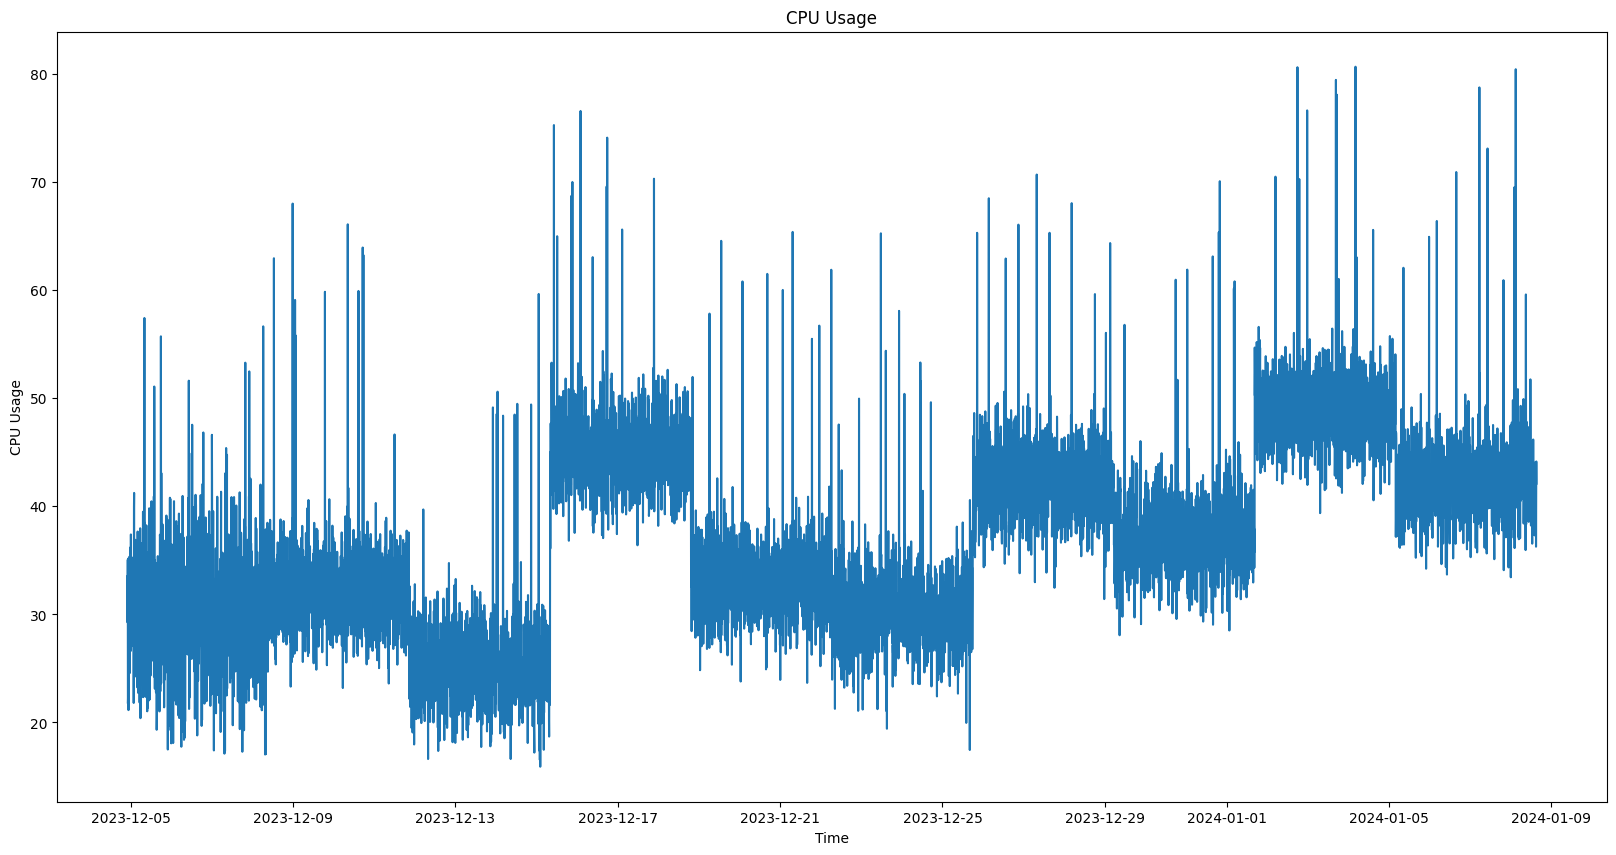

In [36]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


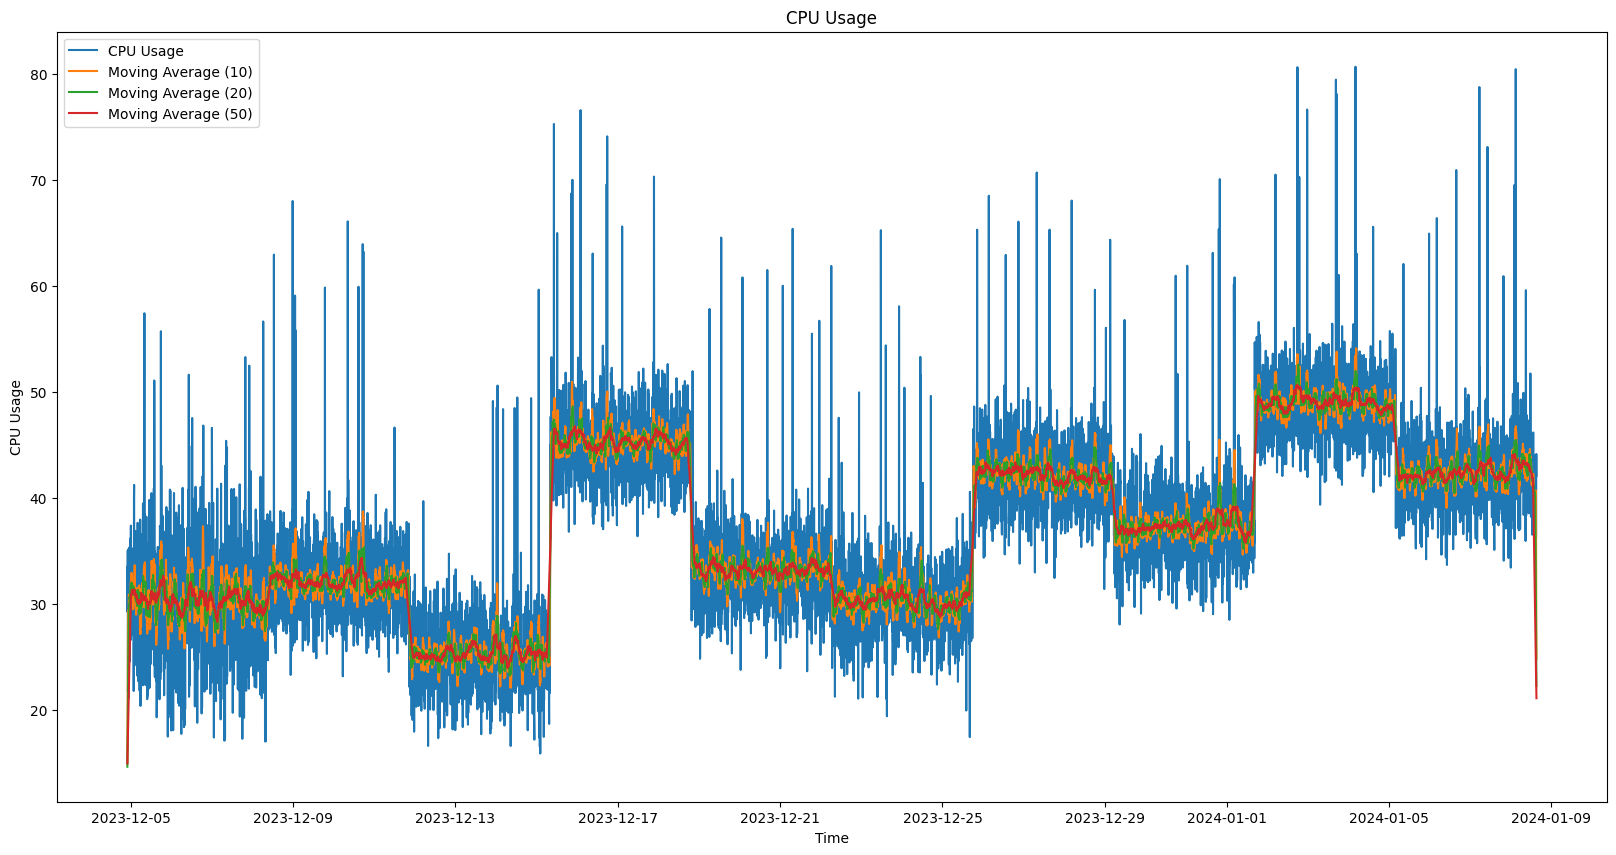

In [37]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 10), label='Moving Average (10)')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 20), label='Moving Average (20)')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

In [38]:
anomalies = detect_anomalies(cpu_data['cpu_usage'], 20, 5)

IndexError: Boolean index has wrong length: 10019 instead of 10000

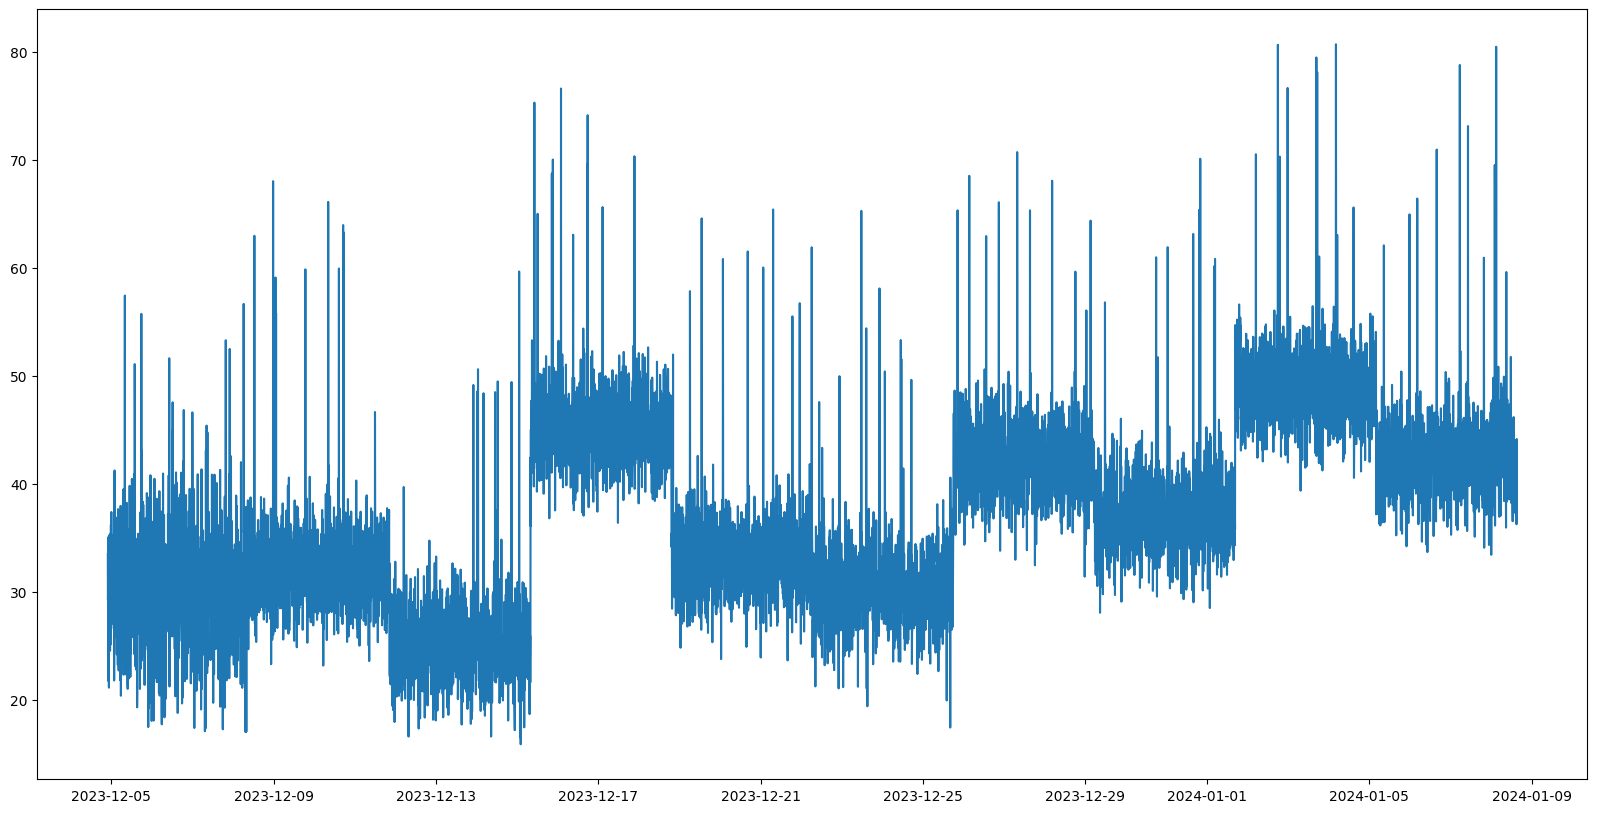

In [39]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.scatter(cpu_data['timestamp'][anomalies == 1], cpu_data['cpu_usage'][anomalies == 1], color='red', label='Anomalies')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()